In [1]:
suppressPackageStartupMessages({
    library(scater)
    library(Seurat)
    library(ComplexHeatmap)
    library(logger)
    library(infercnv)
})


# Read inferCNV

In [3]:
infercnv_obj <- readRDS("./out_inferCNV/hepatoctyes_sd1.75_NULL/run.final.infercnv_obj")

# Meidan Filtering

In [4]:
log_info("Applying Median filtering...")
infercnv_obj_medianfiltered = infercnv::apply_median_filtering(infercnv_obj = infercnv_obj, on_observations = TRUE)
log_info("Done filtering...")


In [5]:
mt_obs <- infercnv_obj_medianfiltered@expr.data

In [ ]:

calculateCNVscore <- function(mt) {
    
}

In [79]:
#mt_obs <- infercnv_obj@expr.data

# Read Gene order

In [16]:
gene_order <- infercnv_obj_medianfiltered@gene_order

# Read SCE

In [6]:
sce1 <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_epithelial.rds")
sce1 <- sce1[grepl("protein_coding", rowData(sce1)$Biotype),]
sce1 <- sce1[grepl("^chr", rowData(sce1)$Chr), ]

In [7]:
sce2 <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_stromal.rds")
sce2 <- sce2[grepl("protein_coding", rowData(sce2)$Biotype),]
sce2 <- sce2[grepl("^chr", rowData(sce2)$Chr), ]

In [12]:
sce_caf <-  readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_stromal_caf.rds")

In [10]:
coldata <- rbind(colData(sce1)[, c("donor", "tissue")], colData(sce2)[, c("donor", "tissue")])

In [11]:
# Order Patient
coldata$donor <- factor(coldata$donor, levels = c("D20180110", "D20171220", "D20170327", "D20170322", "D20180108", "D20170412", "D20171109"))
# Order tissue then patient
coldata <- coldata[order(coldata$tissue, coldata$donor),]
mt_obs <- mt_obs[, rownames(coldata)]

In [13]:
coldata[colnames(sce1), "celltype"] <- sce1$donor

In [14]:
coldata[colnames(sce2), "celltype"] <- sce2$leiden_sub_anno

In [17]:
# Order gene order
gene_order <- gene_order[rownames(mt_obs),]
gene_order$chr <- factor(gene_order$chr, levels = paste0("chr", 1:22))
gene_order <- gene_order[order(gene_order$chr),]

In [19]:
cell_info <- coldata[, c("donor", "tissue", "celltype"), drop = F]
#cell_info$Sample <- ifelse(grepl("Normal", cell_info$Sample), "Normal", cell_info$Sample)

In [20]:
ha = HeatmapAnnotation(df = cell_info[, "tissue", drop = F], col = list(tissue = c("Tumor" = '#3B4992FF', 'TumorCore'='#EE0000FF', "Normal" = 'grey')))
#mt = mt - rowMeans(mt)
col_fun <- circlize::colorRamp2(c(-0.5, 0, 0.5), c("darkblue", "white", "darkred"))
mt <- t(mt_obs)
mt <- mt - rowMeans(mt)
mt[mt > 1] = 1
mt[mt < -1] = -1

In [120]:
#cell_info$Sample <- factor(cell_info$Sample, levels = c("D20180110_Tumor", "D20180110_TumorCore", "D20170327_Tumor", "D20171220_Tumor", "D20170322_Tumor", "D20170412_Tumor", "D20171109_Tumor",
#                                                        "D20180108_Tumor", "D20180108_TumorCore"))
#order_names <- do.call(c, lapply(split(rownames(mt), cell_info$Sample), function(cids) {
#        sub <- mt[cids,]
#        cl <- hclust(dist(sub), method = 'ward.D2')
#        cl$labels[cl$order]
#}))
#cell_info <- cell_info[order_names,]
#mt <- mt[order_names,]

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



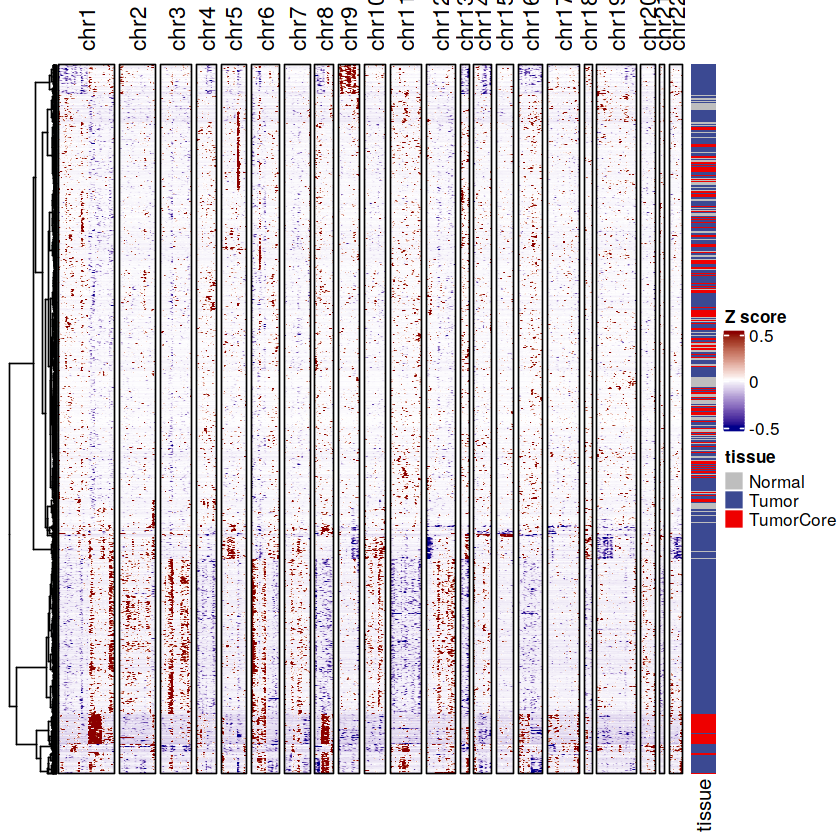

In [21]:

ht <- Heatmap(mt, col = col_fun,  name = "Z score", cluster_rows = TRUE, cluster_columns = FALSE, use_raster = TRUE,
              clustering_method_columns = 'ward.D2', clustering_method_rows = 'ward.D2', show_column_names = F, show_row_names = F,  
              column_split = gene_order$chr, row_split = cell_info$Sample, row_title_rot = 0, column_title_rot = 90, border = TRUE) + 
rowAnnotation(df = cell_info[, "tissue", drop = F], col = list(tissue = c("Tumor" = '#3B4992FF', 'TumorCore'='#EE0000FF', "Normal" = "grey"))) 

#pdf("../08_figures/figures/Figure2/Figure2B_heatmap_inferCNV_hepatocytes_average_split_donor_ordered_1.75.pdf", width = 24, height = 9)
draw(ht)
#dev.off()


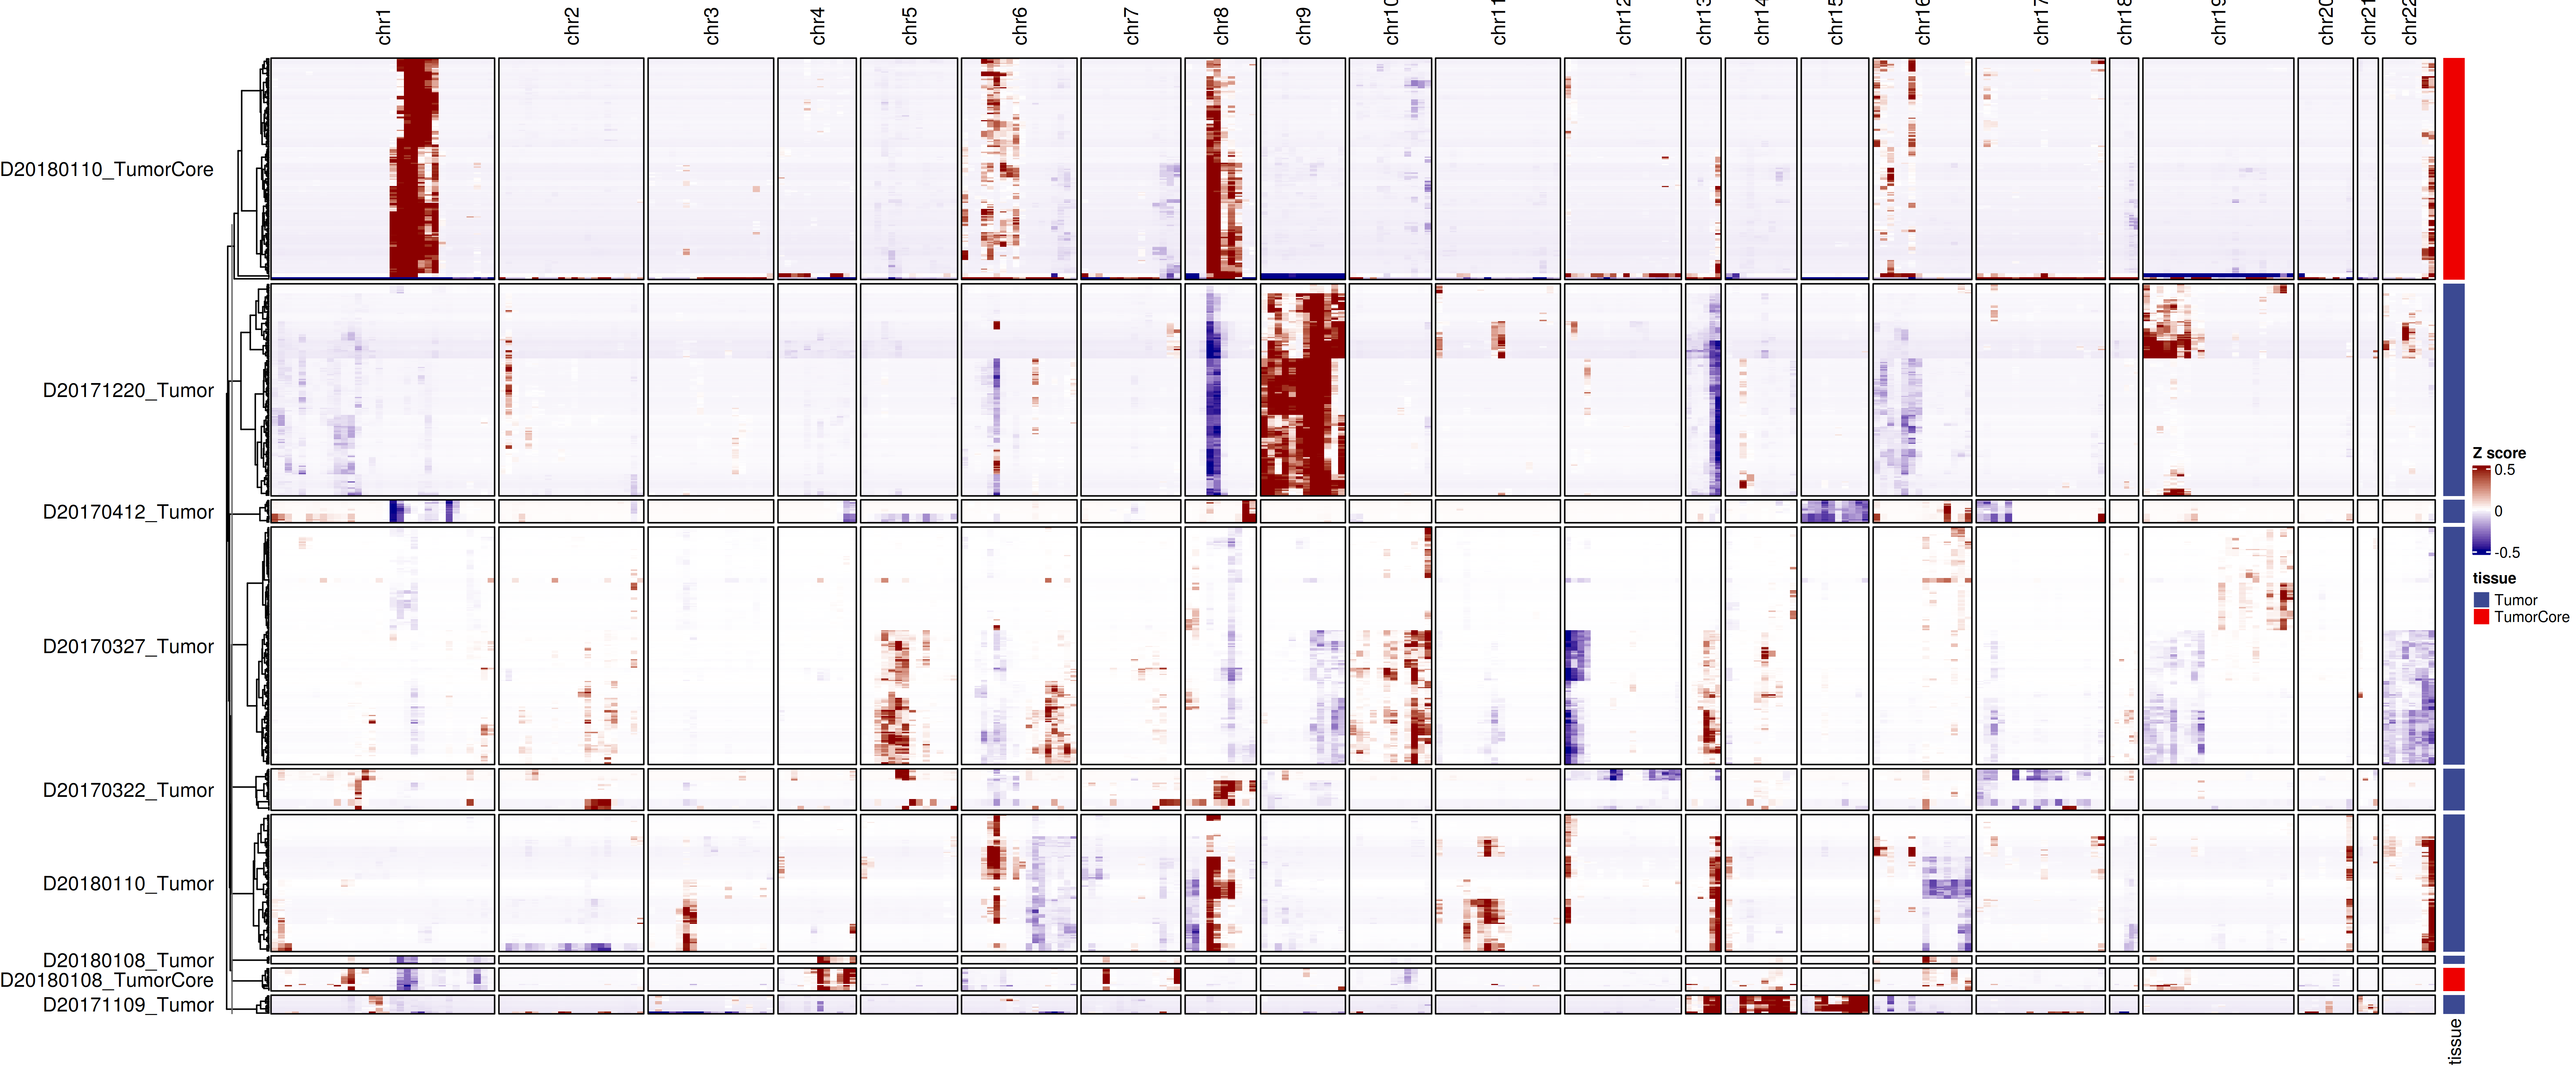

In [123]:
options(repr.plot.width = 24, repr.plot.height = 10, repr.plot.res = 300)

draw(ht)

# Figure 1

In [168]:
ht <- Heatmap(mt, col = col_fun,  name = "Z score", cluster_rows = FALSE, cluster_columns = FALSE, 
              clustering_method_columns = 'ward.D2', show_column_names = F, show_row_names = F,  
              column_split = gene_order$chr, row_split = cell_info$Sample, row_title_rot = 0, column_title_rot = 90, border = TRUE) + 
rowAnnotation(df = cell_info[, "tissue", drop = F], col = list(tissue = c("Tumor" = '#3B4992FF', 'TumorCore'='#EE0000FF', "Normal" = "grey"))) 

pdf("../05_figures/figures/Figure1D_heatmap_inferCNV_hepatocytes_average_split_donor_ordered_1.75.pdf", width = 24, height = 9)
draw(ht)
dev.off()

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

# D20180110

In [169]:
mt_obs <- infercnv_obj_medianfiltered@expr.data
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_hepatocytes.rds")
sce <- sce[, colnames(mt_obs)]
coldata <- as.data.frame(colData(sce))
coldata <- coldata[coldata$donor == "D20180110",]
mt_obs <- mt_obs[, rownames(coldata)]

In [170]:
cell_info <- coldata[, c("donor", "tissue")]

In [40]:
library(ComplexHeatmap)
ha = HeatmapAnnotation(df = cell_info)
#mt = mt - rowMeans(mt)
col_fun <- circlize::colorRamp2(c(-0.5, 0, 0.5), c("darkblue", "white", "darkred"))
mt <- t(mt_obs)
mt <- mt - rowMeans(mt)
mt[mt > 1] = 1
mt[mt < -1] = -1
ht <- Heatmap(mt, col = col_fun,  cluster_rows = FALSE, cluster_columns = FALSE, 
              clustering_method_columns = 'ward.D2', show_column_names = F, show_row_names = F,  
              column_split = gene_order$chr, row_split = cell_info$reference, border = TRUE) + 
rowAnnotation(df = cell_info[, "tissue", drop =F],  col = list(tissue = c("Tumor" = '#3B4992FF', 'TumorCore'='#EE0000FF', "Normal" = "grey"))) 

pdf("../08_figures/figures/Figure2/Figure2B_heatmap_inferCNV_hepatocytes_average_split_donor_ordered_1.75_D0110.pdf", width = 24, height = 4)
draw(ht)
dev.off()


`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

# D20180108

In [172]:
mt_obs <- infercnv_obj_medianfiltered@expr.data
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_hepatocytes.rds")
sce <- sce[, colnames(mt_obs)]
coldata <- as.data.frame(colData(sce))
coldata <- coldata[coldata$donor == "D20180108",]
mt_obs <- mt_obs[, rownames(coldata)]

In [173]:
cell_info <- coldata[, c("donor", "tissue")]

In [174]:
library(ComplexHeatmap)
ha = HeatmapAnnotation(df = cell_info)
#mt = mt - rowMeans(mt)
col_fun <- circlize::colorRamp2(c(-0.5, 0, 0.5), c("darkblue", "white", "darkred"))
mt <- t(mt_obs)
mt <- mt - rowMeans(mt)
mt[mt > 1] = 1
mt[mt < -1] = -1
ht <- Heatmap(mt, col = col_fun,  cluster_rows = FALSE, cluster_columns = FALSE, 
              clustering_method_columns = 'ward.D2', show_column_names = F, show_row_names = F,  
              column_split = gene_order$chr, row_split = cell_info$reference, border = TRUE) + 
rowAnnotation(df = cell_info[, "tissue", drop =F],  col = list(tissue = c("Tumor" = '#3B4992FF', 'TumorCore'='#EE0000FF', "Normal" = "grey"))) 

pdf("../05_figures/figures/Figure1E_heatmap_inferCNV_hepatocytes_average_split_donor_ordered_1.75_D0108.pdf", width = 24, height = 2)
draw(ht)
dev.off()


`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

# D20171220

In [175]:
mt_obs <- infercnv_obj_medianfiltered@expr.data
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_hepatocytes.rds")
sce <- sce[, colnames(mt_obs)]
coldata <- as.data.frame(colData(sce))
coldata <- coldata[coldata$donor == "D20171220",]
mt_obs <- mt_obs[, rownames(coldata)]

In [176]:
cell_info <- coldata[, c("donor", "tissue")]

In [177]:
library(ComplexHeatmap)
ha = HeatmapAnnotation(df = cell_info)
#mt = mt - rowMeans(mt)
col_fun <- circlize::colorRamp2(c(-0.5, 0, 0.5), c("darkblue", "white", "darkred"))
mt <- t(mt_obs)
mt <- mt - rowMeans(mt)
mt[mt > 1] = 1
mt[mt < -1] = -1
ht <- Heatmap(mt, col = col_fun,  cluster_rows = FALSE, cluster_columns = FALSE, 
              clustering_method_columns = 'ward.D2', show_column_names = F, show_row_names = F,  
              column_split = gene_order$chr, row_split = cell_info$reference, border = TRUE) + 
rowAnnotation(df = cell_info[, "tissue", drop =F],  col = list(tissue = c("Tumor" = '#3B4992FF', 'TumorCore'='#EE0000FF', "Normal" = "grey"))) 

pdf("../05_figures/figures/Figure1E_heatmap_inferCNV_hepatocytes_average_split_donor_ordered_1.75_D1220.pdf", width = 24, height = 4)
draw(ht)
dev.off()


`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

# D20170327


In [178]:
mt_obs <- infercnv_obj_medianfiltered@expr.data
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_hepatocytes.rds")
sce <- sce[, colnames(mt_obs)]
coldata <- as.data.frame(colData(sce))
coldata <- coldata[coldata$donor == "D20170327",]
mt_obs <- mt_obs[, rownames(coldata)]

In [179]:
cell_info <- coldata[, c("donor", "tissue")]

In [180]:
library(ComplexHeatmap)
ha = HeatmapAnnotation(df = cell_info)
#mt = mt - rowMeans(mt)
col_fun <- circlize::colorRamp2(c(-0.5, 0, 0.5), c("darkblue", "white", "darkred"))
mt <- t(mt_obs)
mt <- mt - rowMeans(mt)
mt[mt > 1] = 1
mt[mt < -1] = -1
ht <- Heatmap(mt, col = col_fun,  cluster_rows = FALSE, cluster_columns = FALSE, 
              clustering_method_columns = 'ward.D2', show_column_names = F, show_row_names = F,  
              column_split = gene_order$chr, row_split = cell_info$reference, border = TRUE) + 
rowAnnotation(df = cell_info[, "tissue", drop =F],  col = list(tissue = c("Tumor" = '#3B4992FF', 'TumorCore'='#EE0000FF', "Normal" = "grey"))) 

pdf("../05_figures/figures/Figure1E_heatmap_inferCNV_hepatocytes_average_split_donor_ordered_1.75_D0327.pdf", width = 24, height = 4)
draw(ht)
dev.off()


`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

# Add HMM features

In [188]:
mt_obs <- infercnv_obj_medianfiltered@expr.data
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_hepatocytes.rds")
sce <- sce[, colnames(mt_obs)]
sr <- as.Seurat(sce)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [190]:
sr = infercnv::add_to_seurat(infercnv_output_path="./out_inferCNV/hepatoctyes_sd1.75_NULL_subclusters//",
                                     seurat_obj=sr, # optional
                                     top_n=10
                                     )

In [191]:
colnames(sr@meta.data)

[1] "cell.id"                       "cell.type"                    
  [3] "tissue"                        "facs"                         
  [5] "donor"                         "isHBV"                        
  [7] "isHCV"                         "histology"                    
  [9] "ExonicReads"                   "ExonicReadsPer"               
 [11] "IntronicReads"                 "IntronicReadsPer"             
 [13] "IntergenicReads"               "IntergenicReadsPer"           
 [15] "sum"                           "detected"                     
 [17] "percent_top_50"                "percent_top_100"              
 [19] "percent_top_200"               "percent_top_500"              
 [21] "subsets_mito_sum"              "subsets_mito_detected"        
 [23] "subsets_mito_percent"          "subsets_HBV_sum"              
 [25] "subsets_HBV_detected"          "subsets_HBV_percent"          
 [27] "total"                         "Sample"                       
 [29] "sizeFactor"                    "leiden_global"                
 [31] "leiden_global_celltype"        "leiden_sub"                   
 [33] "celltype_old"                  "has_cnv_chr1"                 
 [35] "has_loss_chr1"                 "has_dupli_chr1"               
 [37] "proportion_cnv_chr1"           "proportion_loss_chr1"         
 [39] "proportion_dupli_chr1"         "proportion_scaled_cnv_chr1"   
 [41] "proportion_scaled_loss_chr1"   "proportion_scaled_dupli_chr1" 
 [43] "has_cnv_chr2"                  "has_loss_chr2"                
 [45] "has_dupli_chr2"                "proportion_cnv_chr2"          
 [47] "proportion_loss_chr2"          "proportion_dupli_chr2"        
 [49] "proportion_scaled_cnv_chr2"    "proportion_scaled_loss_chr2"  
 [51] "proportion_scaled_dupli_chr2"  "has_cnv_chr3"                 
 [53] "has_loss_chr3"                 "has_dupli_chr3"               
 [55] "proportion_cnv_chr3"           "proportion_loss_chr3"         
 [57] "proportion_dupli_chr3"         "proportion_scaled_cnv_chr3"   
 [59] "proportion_scaled_loss_chr3"   "proportion_scaled_dupli_chr3" 
 [61] "has_cnv_chr4"                  "has_loss_chr4"                
 [63] "has_dupli_chr4"                "proportion_cnv_chr4"          
 [65] "proportion_loss_chr4"          "proportion_dupli_chr4"        
 [67] "proportion_scaled_cnv_chr4"    "proportion_scaled_loss_chr4"  
 [69] "proportion_scaled_dupli_chr4"  "has_cnv_chr5"                 
 [71] "has_loss_chr5"                 "has_dupli_chr5"               
 [73] "proportion_cnv_chr5"           "proportion_loss_chr5"         
 [75] "proportion_dupli_chr5"         "proportion_scaled_cnv_chr5"   
 [77] "proportion_scaled_loss_chr5"   "proportion_scaled_dupli_chr5" 
 [79] "has_cnv_chr6"                  "has_loss_chr6"                
 [81] "has_dupli_chr6"                "proportion_cnv_chr6"          
 [83] "proportion_loss_chr6"          "proportion_dupli_chr6"        
 [85] "proportion_scaled_cnv_chr6"    "proportion_scaled_loss_chr6"  
 [87] "proportion_scaled_dupli_chr6"  "has_cnv_chr7"                 
 [89] "has_loss_chr7"                 "has_dupli_chr7"               
 [91] "proportion_cnv_chr7"           "proportion_loss_chr7"         
 [93] "proportion_dupli_chr7"         "proportion_scaled_cnv_chr7"   
 [95] "proportion_scaled_loss_chr7"   "proportion_scaled_dupli_chr7" 
 [97] "has_cnv_chr8"                  "has_loss_chr8"                
 [99] "has_dupli_chr8"                "proportion_cnv_chr8"          
[101] "proportion_loss_chr8"          "proportion_dupli_chr8"        
[103] "proportion_scaled_cnv_chr8"    "proportion_scaled_loss_chr8"  
[105] "proportion_scaled_dupli_chr8"  "has_cnv_chr9"                 
[107] "has_loss_chr9"                 "has_dupli_chr9"               
[109] "proportion_cnv_chr9"           "proportion_loss_chr9"         
[111] "proportion_dupli_chr9"         "proportion_scaled_cnv_chr9"   
[113] "proportion_scaled_loss_chr9"   "proportion_scaled_dupli_chr9" 
[115] "has_c

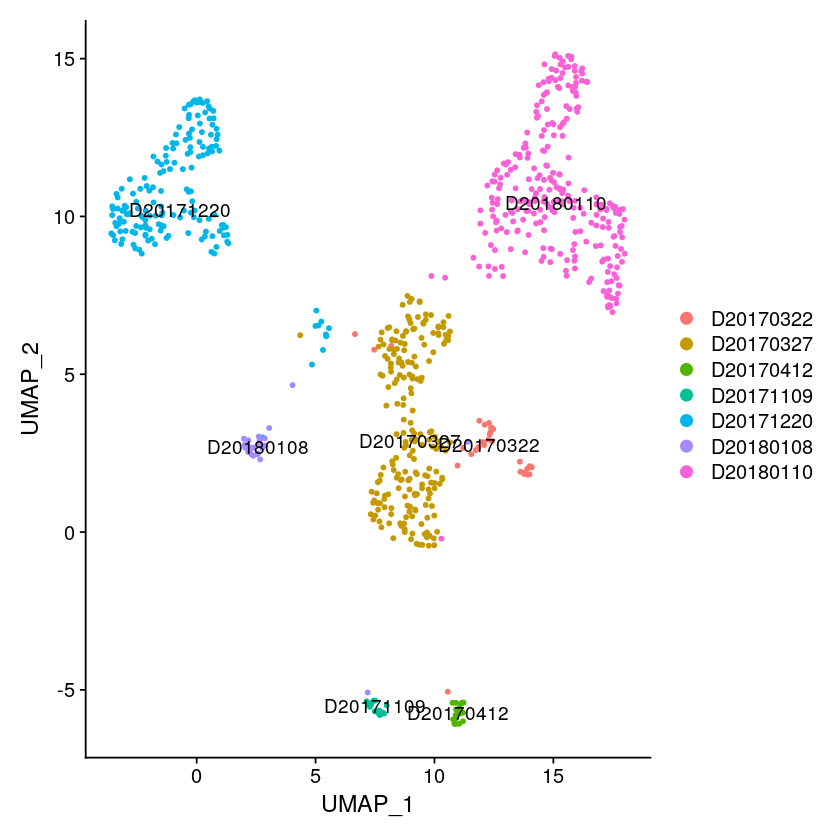

In [192]:
DimPlot(sr, reduction = "UMAP", group.by = "donor", label = T)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



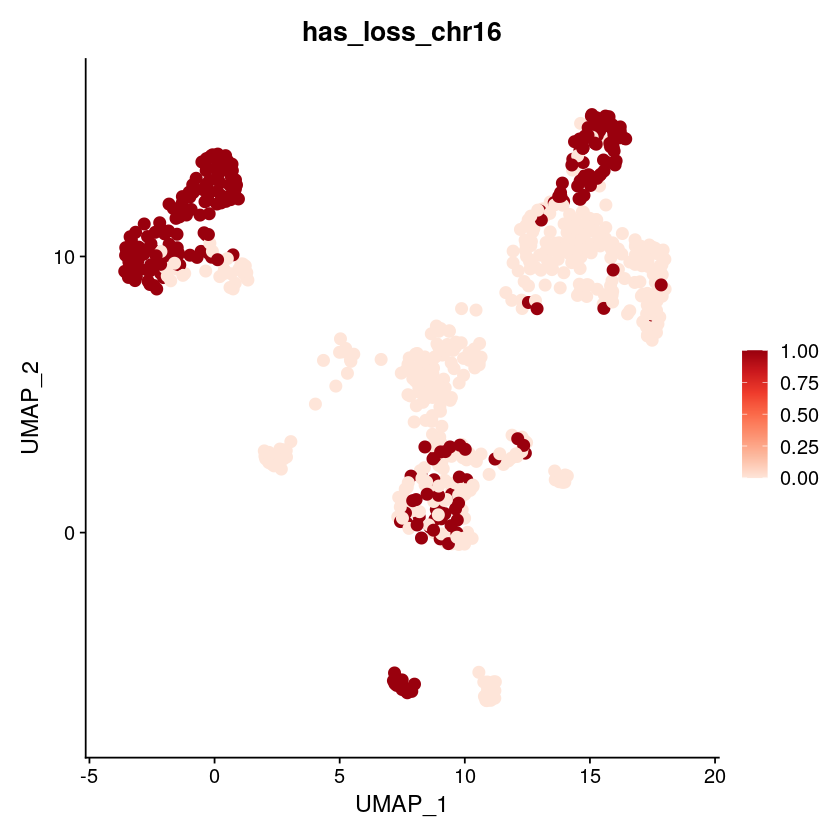

In [195]:
FeaturePlot(sr, reduction="UMAP", features="has_loss_chr16", pt.size = 3) + ggplot2::scale_colour_distiller(palette = "Reds", direction = 1, limits=c(0,1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



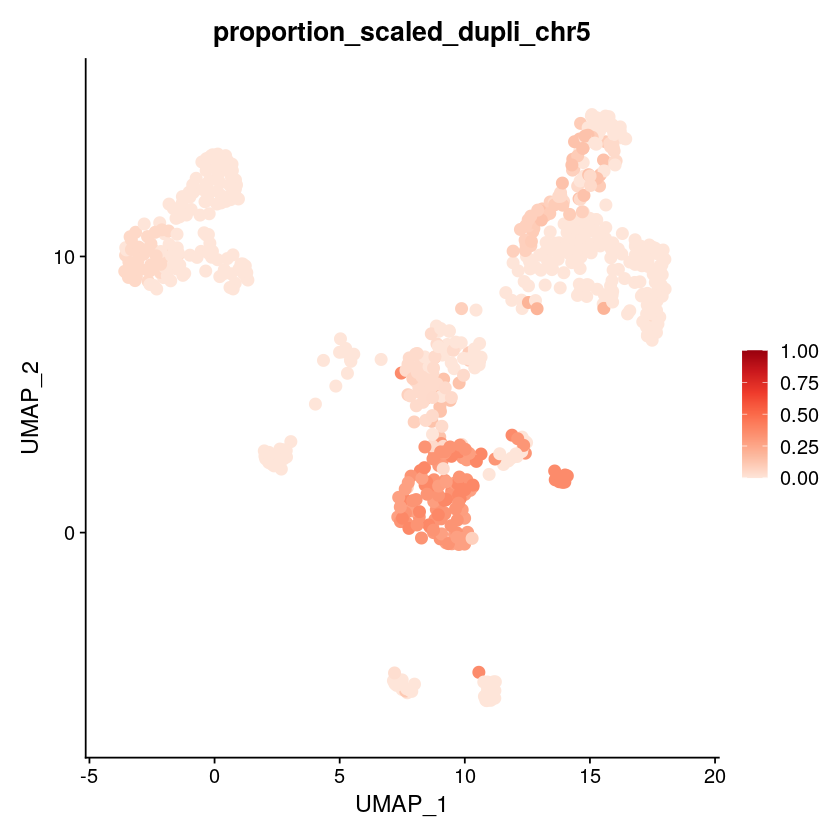

In [194]:
FeaturePlot(sr, reduction="UMAP", features="proportion_scaled_dupli_chr5", pt.size = 3) + ggplot2::scale_colour_distiller(palette = "Reds", direction = 1, limits=c(0,1))